In [2]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
% matplotlib inline

In [4]:
# Import the datasets
Irisdf = pd.read_csv('Iris_DataSet.csv', header = None, names = ['SepalLengthCm','SepalWidthCm',
                                                                 'PetalLengthCm','PetalWidthCm',
                                                                 'Species'])
ElectricPowerdf = pd.read_csv('ElectricPowerData.csv')

In [5]:
print(Irisdf.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [6]:
print(Irisdf.isnull().sum()) # print out the number of null values in each column

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [7]:
# SUmmarizes the key statistics parameters for each column in the dataset
print(Irisdf.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [8]:
# Number of unique types of iris flower present
print(Irisdf['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [9]:
print('Number of unique iris flower types present is ', len(Irisdf['Species'].unique()))

Number of unique iris flower types present is  3


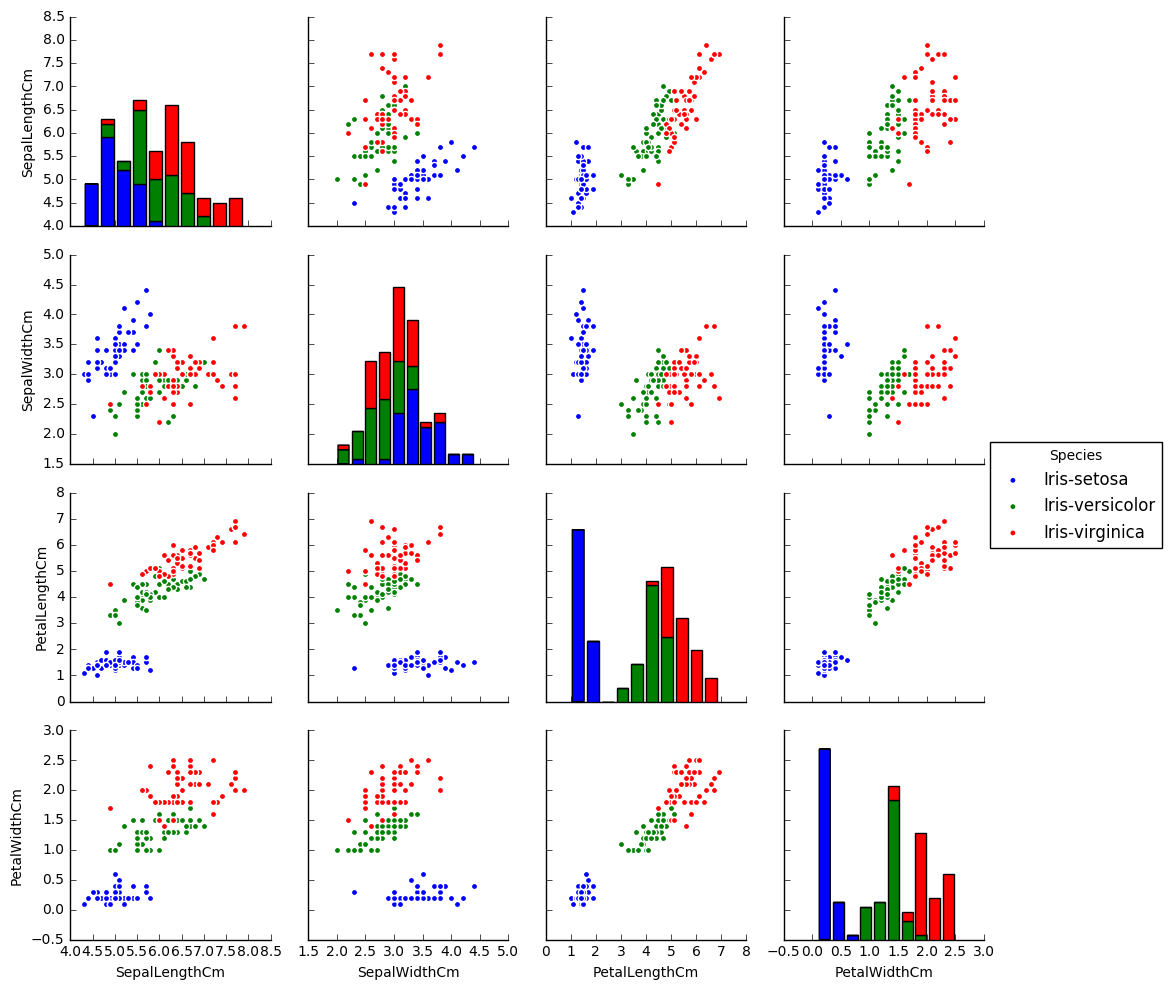

In [10]:
# Data visualizations
sns.pairplot(Irisdf, hue = 'Species')

In [11]:
# Basic Statististics for Electric power dataset
print(ElectricPowerdf.describe())

       Electric Power  Avg Ambient Temp(oF)  No. Days/Month  \
count       12.000000             12.000000       12.000000   
mean       277.083333             57.083333       24.333333   
std         24.444588             19.406926        1.302678   
min        236.000000             25.000000       21.000000   
25%        265.500000             43.250000       24.000000   
50%        275.000000             60.000000       25.000000   
75%        297.000000             72.750000       25.000000   
max        316.000000             84.000000       26.000000   

       Avg Product Purity(%)  Product Produced(Tons)  
count              12.000000               12.000000  
mean               89.333333               99.333333  
std                 2.269695                6.429101  
min                86.000000               88.000000  
25%                87.750000               95.750000  
50%                89.500000               98.500000  
75%                91.000000              101.2

In [12]:
# Checking for missing values
print('Number of missing values per column')
print(ElectricPowerdf.isnull().sum())

Number of missing values per column
Electric Power            0
Avg Ambient Temp(oF)      0
No. Days/Month            0
Avg Product Purity(%)     0
Product Produced(Tons)    0
dtype: int64


In [13]:
print('Both datasets dont have missing values, hence no need for filling with median')

Both datasets dont have missing values, hence no need for filling with median


In [14]:
Irisdf.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [15]:
# Developing the matrix of features
X_matrix = Irisdf[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [16]:
print(X_matrix)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
5              5.4           3.9            1.7           0.4
6              4.6           3.4            1.4           0.3
7              5.0           3.4            1.5           0.2
8              4.4           2.9            1.4           0.2
9              4.9           3.1            1.5           0.1
10             5.4           3.7            1.5           0.2
11             4.8           3.4            1.6           0.2
12             4.8           3.0            1.4           0.1
13             4.3           3.0            1.1           0.1
14             5.8           4.0            1.2           0.2
15      

In [17]:
# Scale the variables in the iris dataset
scaled = StandardScaler() # Instantiate
scaled.fit(X_matrix)
X_matrix_scaled = scaled.transform(X_matrix)

In [18]:
print(X_matrix_scaled)

[[ -9.00681170e-01   1.03205722e+00  -1.34127240e+00  -1.31297673e+00]
 [ -1.14301691e+00  -1.24957601e-01  -1.34127240e+00  -1.31297673e+00]
 [ -1.38535265e+00   3.37848329e-01  -1.39813811e+00  -1.31297673e+00]
 [ -1.50652052e+00   1.06445364e-01  -1.28440670e+00  -1.31297673e+00]
 [ -1.02184904e+00   1.26346019e+00  -1.34127240e+00  -1.31297673e+00]
 [ -5.37177559e-01   1.95766909e+00  -1.17067529e+00  -1.05003079e+00]
 [ -1.50652052e+00   8.00654259e-01  -1.34127240e+00  -1.18150376e+00]
 [ -1.02184904e+00   8.00654259e-01  -1.28440670e+00  -1.31297673e+00]
 [ -1.74885626e+00  -3.56360566e-01  -1.34127240e+00  -1.31297673e+00]
 [ -1.14301691e+00   1.06445364e-01  -1.28440670e+00  -1.44444970e+00]
 [ -5.37177559e-01   1.49486315e+00  -1.28440670e+00  -1.31297673e+00]
 [ -1.26418478e+00   8.00654259e-01  -1.22754100e+00  -1.31297673e+00]
 [ -1.26418478e+00  -1.24957601e-01  -1.34127240e+00  -1.44444970e+00]
 [ -1.87002413e+00  -1.24957601e-01  -1.51186952e+00  -1.44444970e+00]
 [ -5.

In [19]:
# Separate the electric dataset into y and x values
print(ElectricPowerdf.columns)

Index(['Electric Power', 'Avg Ambient Temp(oF)', 'No. Days/Month',
       'Avg Product Purity(%)', 'Product Produced(Tons)'],
      dtype='object')


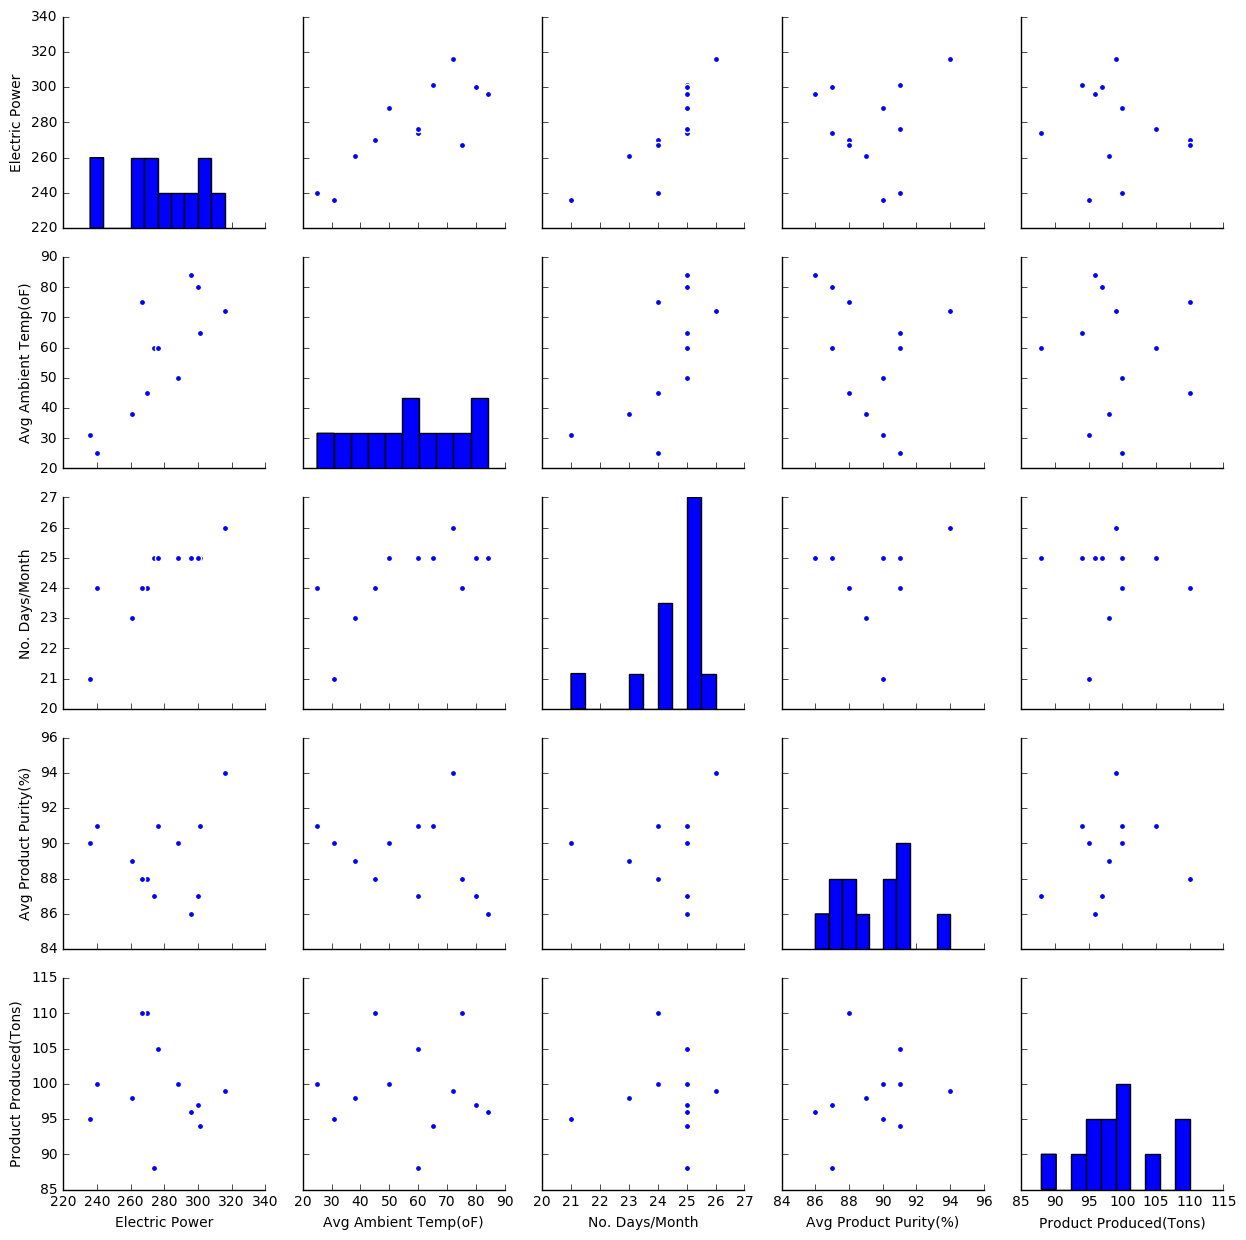

In [20]:
# produce some visualizations on the Electric power dataset
sns.pairplot(ElectricPowerdf)

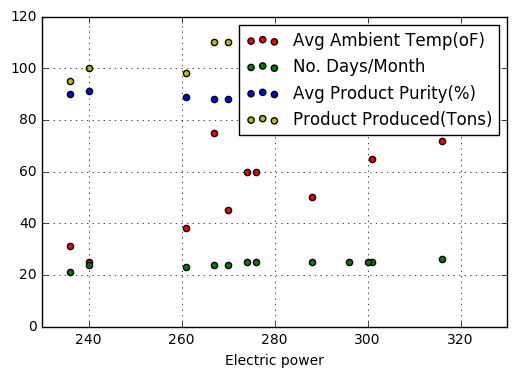

In [21]:
# Scatter plot
plt.scatter(y = ElectricPowerdf['Avg Ambient Temp(oF)'], x = ElectricPowerdf['Electric Power'], c = 'r')
plt.scatter(y = ElectricPowerdf['No. Days/Month'], x = ElectricPowerdf['Electric Power'], c = 'g')
plt.scatter(y = ElectricPowerdf['Avg Product Purity(%)'], x = ElectricPowerdf['Electric Power'])
plt.scatter(y = ElectricPowerdf['Product Produced(Tons)'], x = ElectricPowerdf['Electric Power'], c = 'y')
plt.xlabel('Electric power')
plt.grid()
plt.legend()
plt.show()



In [22]:
#Extract the output variable
Y_ElectricPowerdf= ElectricPowerdf['Electric Power']

In [23]:
# Extract the features
X_ElectricPowerdf = ElectricPowerdf[['Avg Ambient Temp(oF)', 'No. Days/Month',
       'Avg Product Purity(%)', 'Product Produced(Tons)']]

In [24]:
# The electric power dataset needs to be split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_ElectricPowerdf, Y_ElectricPowerdf, 
                                                    test_size = 0.3)

In [25]:
print(X_train)

    Avg Ambient Temp(oF)  No. Days/Month  Avg Product Purity(%)  \
3                     60              25                     87   
8                     75              24                     88   
2                     45              24                     88   
0                     25              24                     91   
1                     31              21                     90   
7                     84              25                     86   
10                    50              25                     90   
5                     72              26                     94   

    Product Produced(Tons)  
3                       88  
8                      110  
2                      110  
0                      100  
1                       95  
7                       96  
10                     100  
5                       99  


In [26]:
print(X_test)

    Avg Ambient Temp(oF)  No. Days/Month  Avg Product Purity(%)  \
9                     60              25                     91   
4                     65              25                     91   
11                    38              23                     89   
6                     80              25                     87   

    Product Produced(Tons)  
9                      105  
4                       94  
11                      98  
6                       97  


In [27]:
print(y_train)

3     274
8     267
2     270
0     240
1     236
7     296
10    288
5     316
Name: Electric Power, dtype: int64


In [28]:
print(y_test)

9     276
4     301
11    261
6     300
Name: Electric Power, dtype: int64


In [29]:
# Linear regression of the Electric power dataset
lm = LinearRegression() # Instantiate 
lm.fit(X = X_train, y = y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# Show the regression coefficients
lm.coef_

array([ 0.72973312,  8.37052508,  2.76575188, -0.1773508 ])

In [31]:
lm.intercept_

-199.08060014509175

In [32]:
# Produce a dataframe of the coefficients
cdf = pd.DataFrame(lm.coef_, X_ElectricPowerdf.columns , columns = ['Coefficient'])

In [33]:
print(cdf)

                        Coefficient
Avg Ambient Temp(oF)       0.729733
No. Days/Month             8.370525
Avg Product Purity(%)      2.765752
Product Produced(Tons)    -0.177351


In [34]:
# Time to make predictions
predictions = lm.predict(X_test)

In [35]:
print(predictions)

[ 287.02810018  292.62762463  249.94287328  291.97856151]


In [36]:
print(y_test)

9     276
4     301
11    261
6     300
Name: Electric Power, dtype: int64


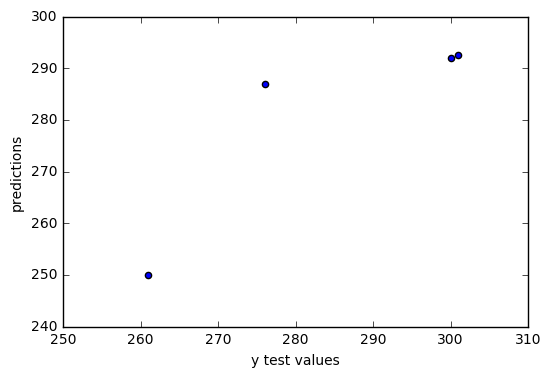

In [37]:
plt.scatter(y_test, predictions)
plt.xlabel('y test values')
plt.ylabel('predictions')
plt.show()

Logistic regression of Iris dataset

In [38]:
# Extract first 100 rows of the scaled dataset for X and Y
X_iris_scaled = X_matrix_scaled[0:100,:]

In [39]:
print(X_iris_scaled.shape)

(100, 4)


In [40]:
#Irisdf['Species'].iloc[range(100)]

In [41]:
#Irisdf['Specie Code'] = 1

In [42]:
Irisdf_100 = Irisdf[0:100] # Extracts the first 100 rows of the dataset

In [43]:
Irisdf_100['Specie Code'] = np.nan

C:\Users\BODE\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [44]:
#LOG = Irisdf_100['Species'] == 'Iris-setosa'

In [45]:
#Irisdf_100[LOG].fillna(1)

In [46]:
print(Irisdf_100)

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species  \
0             5.1           3.5            1.4           0.2      Iris-setosa   
1             4.9           3.0            1.4           0.2      Iris-setosa   
2             4.7           3.2            1.3           0.2      Iris-setosa   
3             4.6           3.1            1.5           0.2      Iris-setosa   
4             5.0           3.6            1.4           0.2      Iris-setosa   
5             5.4           3.9            1.7           0.4      Iris-setosa   
6             4.6           3.4            1.4           0.3      Iris-setosa   
7             5.0           3.4            1.5           0.2      Iris-setosa   
8             4.4           2.9            1.4           0.2      Iris-setosa   
9             4.9           3.1            1.5           0.1      Iris-setosa   
10            5.4           3.7            1.5           0.2      Iris-setosa   
11            4.8           

In [47]:
# Create a target column with 0 representing Iris-setosa and 1 Iris-versicolor

In [48]:
Irisdf_100.fillna(value = 0, limit = 50, inplace = True)

C:\Users\BODE\Anaconda3\lib\site-packages\pandas\core\frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [49]:
Irisdf_100.fillna(1, inplace = True)

C:\Users\BODE\Anaconda3\lib\site-packages\pandas\core\frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [50]:
print(Irisdf_100)

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species  \
0             5.1           3.5            1.4           0.2      Iris-setosa   
1             4.9           3.0            1.4           0.2      Iris-setosa   
2             4.7           3.2            1.3           0.2      Iris-setosa   
3             4.6           3.1            1.5           0.2      Iris-setosa   
4             5.0           3.6            1.4           0.2      Iris-setosa   
5             5.4           3.9            1.7           0.4      Iris-setosa   
6             4.6           3.4            1.4           0.3      Iris-setosa   
7             5.0           3.4            1.5           0.2      Iris-setosa   
8             4.4           2.9            1.4           0.2      Iris-setosa   
9             4.9           3.1            1.5           0.1      Iris-setosa   
10            5.4           3.7            1.5           0.2      Iris-setosa   
11            4.8           

In [51]:
print(X_iris_scaled)

[[ -9.00681170e-01   1.03205722e+00  -1.34127240e+00  -1.31297673e+00]
 [ -1.14301691e+00  -1.24957601e-01  -1.34127240e+00  -1.31297673e+00]
 [ -1.38535265e+00   3.37848329e-01  -1.39813811e+00  -1.31297673e+00]
 [ -1.50652052e+00   1.06445364e-01  -1.28440670e+00  -1.31297673e+00]
 [ -1.02184904e+00   1.26346019e+00  -1.34127240e+00  -1.31297673e+00]
 [ -5.37177559e-01   1.95766909e+00  -1.17067529e+00  -1.05003079e+00]
 [ -1.50652052e+00   8.00654259e-01  -1.34127240e+00  -1.18150376e+00]
 [ -1.02184904e+00   8.00654259e-01  -1.28440670e+00  -1.31297673e+00]
 [ -1.74885626e+00  -3.56360566e-01  -1.34127240e+00  -1.31297673e+00]
 [ -1.14301691e+00   1.06445364e-01  -1.28440670e+00  -1.44444970e+00]
 [ -5.37177559e-01   1.49486315e+00  -1.28440670e+00  -1.31297673e+00]
 [ -1.26418478e+00   8.00654259e-01  -1.22754100e+00  -1.31297673e+00]
 [ -1.26418478e+00  -1.24957601e-01  -1.34127240e+00  -1.44444970e+00]
 [ -1.87002413e+00  -1.24957601e-01  -1.51186952e+00  -1.44444970e+00]
 [ -5.

In [52]:
Y_values_iris = Irisdf_100['Specie Code']

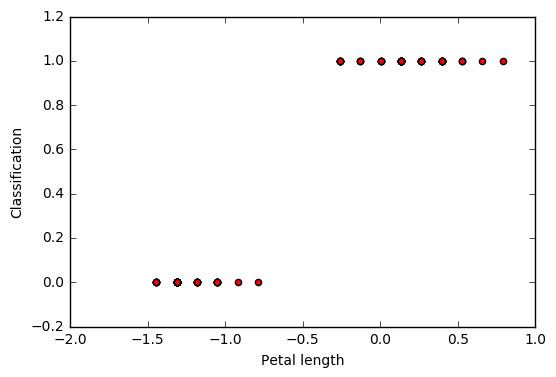

In [53]:

plt.scatter(X_iris_scaled[:,3:], Y_values_iris, c = 'r')
plt.xlabel('Petal length')
plt.ylabel('Classification')
plt.show()

In [54]:
# Split the data into training and testing
X_train_log , X_test_log , y_train_log, y_test_log = train_test_split(X_iris_scaled,Y_values_iris, test_size = 0.3)

In [55]:
# Fit the data using logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train_log,y_train_log)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
predictions = logmodel.predict(X_test_log)

In [57]:
print(predictions)

[ 0.  1.  1.  1.  0.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  1.
  0.  1.  1.  0.  0.  1.  1.  1.  1.  0.  1.  1.]


In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test_log,predictions))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        14
        1.0       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00        30



Perceptron

In [60]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 11 19:14:33 2017

@author: egidiomarotta
"""
import numpy as np
class Perceptron(object):
    """ Perceptron Classifier.
    Parameter
    ---------
    eta:float
        Learning rate (0.0 to 1.0)
    n_iter:int
        Passes over the training dataset
        
    Attributes
    ----------
    w_:1d-array
       weights after fitting
    error_:list
    Number of misclassifications in every epoch
    """
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self,X,y):
        """Fitting data
        Parameter
        ---------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors, n_sample is the no. of samples and n_features is the no. of features.
        y: array-like, shape = [n_samples]
            Target values
        Returns
        ----------
        self:object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta*(target-self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update !=0.0)
            self.errors_.append(errors)
            print(self.w_)
        return self
    
    def net_input(self,X):
        """calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        """returns class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        


In [64]:
#PERCEPTRON
from sklearn.preprocessing import StandardScaler




In [66]:
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [67]:
from sklearn.cross_validation import train_test_split


In [69]:
ppn = Perceptron(eta = 0.1, n_iter = 10)

In [70]:

ppn.fit(X_train_log, y_train_log)
#Prediction of class labels based on the trained data and the generated weights
y_pred = ppn.predict(X_test_log)
print('Misclassified samples: %d' % (y_test_log != y_pred).sum())

[ 0.4         0.18498295 -0.14254423  0.1231332   0.22420524]
[ 0.6         0.18659852  0.202709   -0.06550929  0.00105178]
[ 0.4         0.2334501  -0.28138601  0.11176006  0.22420524]
[ 0.6         0.25929924 -0.07497456  0.0709684   0.21140854]
[ 0.6         0.05331386 -0.30637753  0.01410269  0.06678827]
[ 0.4         0.10016544 -0.51278897  0.23686461  0.18476335]
[ 0.4         0.18498295  0.18141992  0.24823775  0.19791064]
[ 0.6         0.1138978   0.01758663  0.18469981  0.23770313]
[ 0.4         0.01534793 -0.42022778  0.33922288  0.30308902]
[ 0.4         0.05169829 -0.3276666   0.32784974  0.21105794]
Misclassified samples: 14


In [72]:

#Calculation of the Accuracy of the Classification

## use accuracy_score function on y_test and y_pred and print results
print('Accuracy: %.2f' % accuracy_score(y_test_log, y_pred))

Accuracy: 0.53


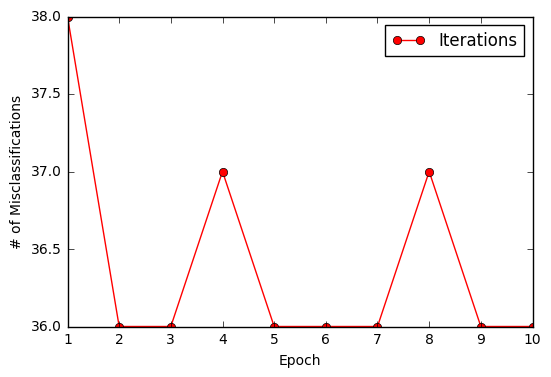

In [76]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, color = 'r', marker ='o', label ='Iterations')
plt.xlabel('Epoch')
plt.ylabel('# of Misclassifications')
plt.legend(loc = 'upper right')
#pylab.savefig('perception_epoches.png',dpi=300)
plt.show()

plt.close('all')

In [88]:
def plot_decision_regions(X_iris_scaled,Y_values_iris, classifier, resolution = 0.02):
    # setup the markers nd colors map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(Y_values_iris))])
    print('------------------------------------------')

#plot the decision space
    x1_min, x1_max = X_iris_scaled[:, 0].min()-1, X_iris_scaled[:, 0].max()+1
    x2_min, x2_max = X_iris_scaled[:, 1].min()-1, X_iris_scaled[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot class sample
    for idx, cl in enumerate(np.unique(Y_values_iris)):
        plt.scatter(x=X_iris_scaled[y == cl, 0], y=X_iris_scaled[y ==cl, 1], s= 10, alpha = 0.8, c = cmap(idx), marker = markers[idx], label = cl)

plt.close('all')

In [90]:


plot_decision_regions(X_iris_scaled,Y_values_iris, classifier = ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.title('Decision Surface', fontsize=12)
#pylab.savefig('decision_surface.png',dpi=300)
plt.show()



------------------------------------------


ValueError: shapes (99792,2) and (4,) not aligned: 2 (dim 1) != 4 (dim 0)

Alpine

In [91]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 11 19:14:33 2017

@author: egidiomarotta
"""
import numpy as np
class Adaline(object):
    """ Adaptive Linear Neuron Classifier
    Parameter
    ---------
    eta:float
        Learning rate (0.0 to 1.0)
    n_iter:int
        Passes over the training dataset
        
    Attributes
    ----------
    w_:1d-array
       weights after fitting
    error_:list
    Number of misclassifications in every epoch
    """
    def __init__(self, eta = 0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self,X,y):
        """Fitting training data.
        
        Parameter
        ---------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors, n_sample is the no. of samples and n_features is the no. of features.
        y: array-like, shape = [n_samples]
            Target values
        Returns
        ----------
        self:object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
                output = self.net_input(X)
                errors = (y-output)
                self.w_[1:] += self.eta*X.T.dot(errors)
                self.w_[0] += self.eta*errors.sum()
                cost = (errors**2).sum()/2.0
                self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        """calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self,X):
        return self.net_input(X)
    
    def predict(self,X):
        """returns class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [92]:
from ADALINE import Adaline
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model


In [96]:
ada = Adaline(eta = 0.01, n_iter = 50)
ada.fit(X_train_log, y_train_log)
#Prediction of class labels based on the trained data and the generated weights
y_pred = ada.predict(X_test_log)
print('Misclassified samples: %d' % (y_test_log != y_pred).sum())

Misclassified samples: 21


Accuracy: 0.30


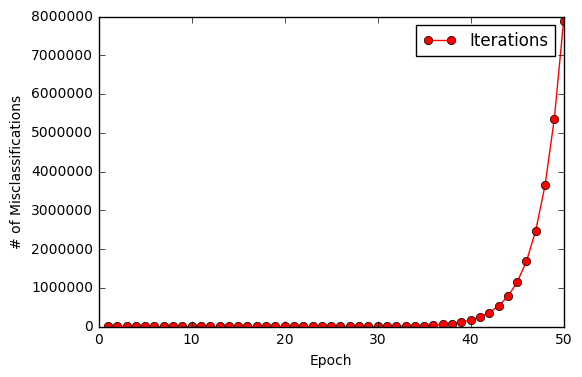

In [100]:
#Calculation of the Accuracy of the Classification
from sklearn.metrics import accuracy_score
## use accuracy_score function on y_test and y_pred and print results
print('Accuracy: %.2f' % accuracy_score(y_test_log, y_pred))

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, color = 'r', marker ='o', label ='Iterations')
plt.xlabel('Epoch')
plt.ylabel('# of Misclassifications')
plt.legend(loc = 'upper right')
#pylab.savefig('perception_epoches.png',dpi=300)
plt.show()

plt.close('all')

In [107]:



from matplotlib.colors import ListedColormap

def plot_decision_regions(X_iris_scaled,Y_values_iris, classifier, resolution = 0.02):
    # setup the markers nd colors map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(Y_values_iris))])
    print('------------------------------------------')

#plot the decision space
    x1_min, x1_max = X_iris_scaled[:, 0].min()-1, X_iris_scaled[:, 0].max()+1
    x2_min, x2_max = X_iris_scaled[:, 1].min()-1, X_iris_scaled[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot class sample
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X_iris_scaled[y == cl, 0], y=X_iris_scaled[y ==cl, 1], s= 10, alpha = 0.8, c = cmap(idx), marker = markers[idx], label = cl)

plt.close('all')

In [108]:
   
plot_decision_regions(X_iris_scaled,Y_values_iris, classifier = ada)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.title('Decision Surface', fontsize=12)
pylab.savefig('decision_surface.png',dpi=300)
plt.show()

------------------------------------------


ValueError: shapes (99792,2) and (4,) not aligned: 2 (dim 1) != 4 (dim 0)